In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
# Приводим атрибут к числовому типу данных
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [6]:
# Как критики относятся к спортивным играм?
# Сравним оценки критиков и пользователей по спортивным играм
# Гипотеза H0 - оценки критиков и пользователей не различаются
# Гипотеза H1 - оценки критиков и пользователей различаются
# Выберем уровень значимости alpha = 0.01

# Формируем 2 выборки с оценками
critic_score_sports = df[df['Genre'] == 'Sports']['Critic_Score']
critic_score_other = df[df['Genre'] != 'Sports']['Critic_Score']

In [7]:
# Проводим тест
alpha = 0.01
t, p_value = stats.ttest_ind(critic_score_sports, critic_score_other, nan_policy='omit', equal_var=False)
t, p_value

(8.08698828481822, 1.1811713083203639e-15)

In [8]:
if p_value <= alpha:
    print('Гипотеза H0 отвергается, оценки критиков и пользователей различаются')
else:
    print('Гипотеза H0 подтверждается, оценки критиков и пользователей не различаются')

Гипотеза H0 отвергается, оценки критиков и пользователей различаются


In [9]:
critic_score_sports.mean(), critic_score_other.mean()

(71.96817420435511, 68.4516779490134)

(array([  4.,   3.,   4.,   7.,  14.,  17.,  24.,  29.,  36.,  55.,  69.,
         84., 119., 112., 158., 187., 125., 107.,  35.,   5.]),
 array([19.  , 22.95, 26.9 , 30.85, 34.8 , 38.75, 42.7 , 46.65, 50.6 ,
        54.55, 58.5 , 62.45, 66.4 , 70.35, 74.3 , 78.25, 82.2 , 86.15,
        90.1 , 94.05, 98.  ]),
 <BarContainer object of 20 artists>)

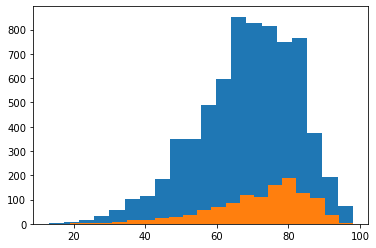

In [10]:
plt.hist(critic_score_other, bins=20)
plt.hist(critic_score_sports, bins=20)

In [11]:
# Критики отностяся к спортивным играм лучше, чем пользователи

In [12]:
# Критикам нравятся больше игры на PC или на PS4?
# Сравним оценки критиков игр на PC и PS4
# Гипотеза H0 - оценки критиков игр на PC и PS4 не различаются
# Гипотеза H1 - оценки критиков игр на PC и PS4 различаются
# Выберем уровень значимости alpha = 0.01
pc_critic_score = df[df['Platform'] == 'PC']['Critic_Score']
ps4_critic_score = df[df['Platform'] == 'PS4']['Critic_Score']

In [13]:
# Проводим тест
alpha = 0.01
t, p_value = stats.ttest_ind(pc_critic_score, ps4_critic_score, nan_policy='omit', equal_var=False)
t, p_value

(4.3087588262138725, 2.0672491572827482e-05)

In [14]:
if p_value <= alpha:
    print('Гипотеза H0 отвергается, оценки критиков игр на PC и PS4 различаются')
else:
    print('Гипотеза H0 подтверждается, оценки критиков игр на PC и PS4 не различаются')

Гипотеза H0 отвергается, оценки критиков игр на PC и PS4 различаются


In [15]:
pc_critic_score.mean(), ps4_critic_score.mean()

(75.92867132867133, 72.09126984126983)

<AxesSubplot:>

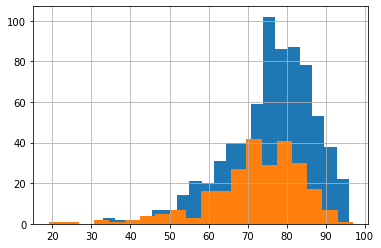

In [16]:
pc_critic_score.hist(bins=20)
ps4_critic_score.hist(bins=20)

In [17]:
# Критикам больше нравятся игры на PC

In [18]:
# Критикам больше нравятся стрелялки или стратегии?
# Сравним оценки критиков игр жанров стрелялки и стратегии
# Гипотеза H0 - оценки критиков игр жанров стрелялки и стратегии не различаются
# Гипотеза H1 - оценки критиков игр жанров стрелялки и стратегии различаются
# Выберем уровень значимости alpha = 0.01
shooter_critic_score = df[df['Genre'] == 'Shooter']['Critic_Score']
strategy_critic_score = df[df['Genre'] == 'Strategy']['Critic_Score']

In [19]:
# Проводим тест
alpha = 0.01
t, p_value = stats.ttest_ind(shooter_critic_score, strategy_critic_score, nan_policy='omit', equal_var=False)
t, p_value

(-2.2972408230640315, 0.021938989522305212)

In [20]:
if p_value <= alpha:
    print('Гипотеза H0 отвергается, оценки критиков игр жанров стрелялки и стратегии различаются')
else:
    print('Гипотеза H0 подтверждается, оценки критиков игр жанров стрелялки и стратегии не различаются')

Гипотеза H0 подтверждается, оценки критиков игр жанров стрелялки и стратегии не различаются


<AxesSubplot:>

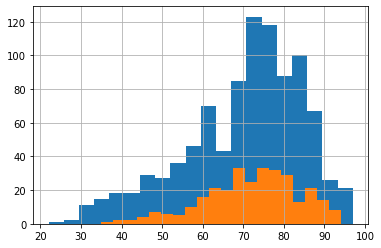

In [21]:
shooter_critic_score.hist(bins=20)
strategy_critic_score.hist(bins=20)